In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [18]:
file_id = '1H4oqRyeuYN6Q8rIpK6-qQDeUfjjcFx1b'
url = f'https://drive.google.com/uc?id={file_id}'

In [19]:
df = pd.read_csv(url)
df.head()

,Data da Venda,ID da Venda,Loja,Região,Vendedor,Produto,Categoria,Quantidade Vendida,Preço Unitário,Receita Total,Custo Total
0,2024-02-24,V0001,Loja Norte,Norte,Carlos,Smartphone,Eletrônicos,5,3785,18925,16959.91
1,2024-06-24,V0002,Loja Sul,Sul,Eduardo,Escrivaninha,Móveis,4,462,1848,1569.89
2,2024-01-18,V0003,Loja Norte,Norte,Daniela,Geladeira,Eletrodomésticos,4,317,1268,1048.81
3,2024-04-21,V0004,Loja Norte,Norte,Eduardo,Notebook,Eletrônicos,4,2645,10580,7834.11
4,2024-01-09,V0005,Loja Sul,Sul,Carlos,Smartphone,Eletrônicos,1,3885,3885,2369.23


VERIFIACANDO SE HÁ ALGUM DADO FALTANTE

In [23]:
df.isnull().sum()

,0
Data da Venda,0
ID da Venda,0
Loja,0
Região,0
Vendedor,0
Produto,0
Categoria,0
Quantidade Vendida,0
Preço Unitário,0
Receita Total,0


##CRIANDO KPIs

In [20]:
receita = df['Receita Total'].sum()

In [21]:
custo = df['Custo Total'].sum()

In [22]:
lucro_total = receita - custo
lucro_total

np.float64(285350.78)

In [7]:
margem_de_lucro = lucro_total / receita
print(f'a margem de lucro é {margem_de_lucro: .2%}')


a margem de lucro é 0.25%


##ANALISE POR REGIÃO

In [8]:
df['Lucro'] = df['Receita Total'] - df['Custo Total']
df.head()

,Data da Venda,ID da Venda,Loja,Região,Vendedor,Produto,Categoria,Quantidade Vendida,Preço Unitário,Receita Total,Custo Total,Lucro
0,2024-02-24,V0001,Loja Norte,Norte,Carlos,Smartphone,Eletrônicos,5,3785,18925,16959.91,1965.09
1,2024-06-24,V0002,Loja Sul,Sul,Eduardo,Escrivaninha,Móveis,4,462,1848,1569.89,278.11
2,2024-01-18,V0003,Loja Norte,Norte,Daniela,Geladeira,Eletrodomésticos,4,317,1268,1048.81,219.19
3,2024-04-21,V0004,Loja Norte,Norte,Eduardo,Notebook,Eletrônicos,4,2645,10580,7834.11,2745.89
4,2024-01-09,V0005,Loja Sul,Sul,Carlos,Smartphone,Eletrônicos,1,3885,3885,2369.23,1515.77


In [9]:
lucro_por_regiao = df.groupby('Região')['Lucro'].sum()
lucro_por_regiao

,Lucro
Região,
Leste,68959.53
Norte,64432.13
Oeste,85625.65
Sul,66333.47


In [10]:
receita_por_regiao = df.groupby('Região')['Receita Total'].sum()
receita_por_regiao

,Receita Total
Região,
Leste,274280
Norte,291043
Oeste,312413
Sul,280278


In [11]:
vendas_por_regiao = df.groupby('Região')['Quantidade Vendida'].sum()
vendas_por_regiao

,Quantidade Vendida
Região,
Leste,139
Norte,149
Oeste,158
Sul,149


In [12]:
lucro_por_categoria = df.groupby('Categoria')['Lucro'].sum()
receita_por_categoria = df.groupby('Categoria')['Receita Total'].sum()
display(lucro_por_categoria)
display(receita_por_categoria)

,Lucro
Categoria,
Eletrodomésticos,107325.78
Eletrônicos,80172.49
Móveis,97852.51


,Receita Total
Categoria,
Eletrodomésticos,437870
Eletrônicos,360363
Móveis,359781


##DESEMPENHO DE VENDENDORES

In [13]:
receita_por_vendedor = df.groupby('Vendedor')['Receita Total'].sum()
receita_por_vendedor

,Receita Total
Vendedor,
Ana,190982
Bruno,200371
Carlos,221506
Daniela,208361
Eduardo,210967
Fernanda,125827


In [14]:
margem_por_vendedor = df.groupby('Vendedor')['Lucro'].sum() / df.groupby('Vendedor')['Receita Total'].sum()
print('margem por vendedor')
display(round(margem_por_vendedor, 2))

margem por vendedor


,0
Vendedor,
Ana,0.22
Bruno,0.25
Carlos,0.23
Daniela,0.27
Eduardo,0.26
Fernanda,0.24


##PLOTANDO GRÁFICO

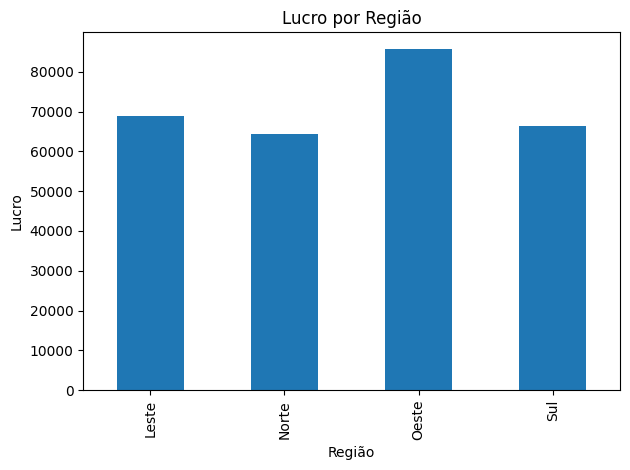

In [15]:
lucro_por_regiao.plot(kind='bar', title='Lucro por Região')
plt.ylabel('Lucro')
plt.tight_layout()
plt.show()

NESSA ANALISE, A REGIAO OESTE TEM SE DESTACADO NA PARTE QUE GERA MAIS LUCRO